contexto: el dataset utilizado contiene 30 muestras y 5 columnas: cuatro variables numéricas extraídas de señales ECG (`mean_rr`, `std_rr`, `skew_rr`, `kurt_rr`) y una columna de etiqueta (`label`) con dos clases: "Normal" y "AFib". El conjunto está ligeramente desbalanceado (18 Normal, 12 AFib). Según el análisis exploratorio, `std_rr` y `kurt_rr` parecen ser las variables más discriminantes entre clases

**Entrenar un modelo base**

In [ ]:
# cargar datos
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# cargar el dataset
df = pd.read_csv('../data/ecg_rr_features_curado.csv')
df.head()

,mean_rr,std_rr,skew_rr,kurt_rr,label
0,849.671415,37.965868,0.404165,3.097078,Normal
1,786.173570,87.045564,0.462868,3.968645,AFib
2,864.768854,49.730056,0.278733,2.297947,Normal
3,952.302986,28.845781,0.260759,2.672338,AFib
4,776.584663,66.450898,0.662505,2.607892,AFib


In [ ]:
# preparar los datos
X = df.drop('label', axis=1)
y = df['label']

# separar en entrenamiento(80) y prueba(20) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Se eligió SVM porque es un modelo clásico de clasificación que ofrece buen desempeño en problemas con pocas muestras y muchas características, como suele ocurrir en datos biomédicos según el profesor 

In [ ]:
# modelo svm
from sklearn.svm import SVC

# Crear y entrenar el modelo
model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)
print("número de muestras de entrenamiento:", len(X_train_scaled) )

numero de muestras de entrenamiento: 24


**Evaluar el desempeño del modelo**

In [ ]:
# evaluar el desempeño del modelo
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

# predicciones
y_pred = model.predict(X_test_scaled)

# métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'La precisión es: {accuracy:.4f}')
print(f'El F1-Score es: {f1:.4f}')
print(f'Precision de predicciones positivas es: {precision:.4f}')
print(f'Recall: {recall:.4f}')

La precisión es: 0.8333
El F1-Score es: 0.8148
Precision de predicciones positivas es: 0.8667
Recall: 0.8333


*Precisión*: Qué tan bien acierta el modelo en general.


*Precision de predicciones positivas*: De los positivos predichos, cuáles realmente lo eran.


*Recall*: De los positivos reales, cuántos fueron encontrados.


*F1-Score*: Equilibrio entre precisión y recall.

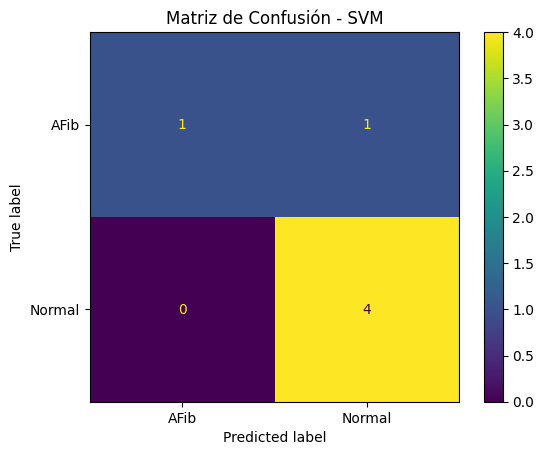

In [ ]:
# visualización de la matriz de confusión
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('Matriz de Confusión - SVM')
plt.show()

# Analizar brevemente los resultados obtenidos


- **AFib (verdadero):**
  - 1 fue correctamente clasificado como AFib (esquina superior izquierda)
  - 1 fue incorrectamente clasificado como Normal (esquina superior derecha)

- **Normal (verdadero):**
  - 4 fueron correctamente clasificados como Normal (esquina inferior derecha)
  - 0 fueron clasificados erróneamente como AFib (esquina inferior izquierda)

### **Resumen:**
- El modelo acertó todos los casos "Normal" (4/4)
- El modelo acertó 1 de 2 casos "AFib" y confundió 1 como "Normal"
- No hubo falsos positivos para "AFib"

### **Particularmente:**
- El modelo es muy bueno detectando "Normal"

- El modelo acierta en más de 8 de cada 10 casos (Precisión aprox 0.83), mostrando un buen desempeño general

- De todas las veces que realmente hay AFib, detecta más de 8 de cada 10 (Recall aprox 0.83), lo que indica buena sensibilidad a detectar los casos de AFib correctamente

- Cuando predice “AFib”, acierta también en casi 9 de cada 10 casos (Precision aprox 0.87), por lo que hay pocos falsos positivos


